#TASK-3  PREDICATION USING DECISION TREE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\HP\Desktop\LGM\Iris.csv')

In [3]:
data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.shape

(150, 6)

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data[["Species"]].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:
data['Species_class']=np.where(data.Species=='Iris-virginics',1,np.where(data.Species=='Iris-versicolor',2,3))

In [10]:
data.Species_class.value_counts()

3    100
2     50
Name: Species_class, dtype: int64

In [11]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

In [12]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]

In [13]:
from sklearn.model_selection import train_test_split 


In [14]:
train_X,test_X,train_Y,test_Y= train_test_split(data[cols],data['Species_class'],test_size=0.2,random_state=123)

In [15]:
param_grid = {'max_depth': np.arange(2,8),'max_features' : np.arange(2,5)}

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=10, verbose=1,n_jobs=1)
tree.fit(train_X,train_Y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [17]:
tree.best_score_

0.9416666666666667

In [18]:
tree.best_params_

{'max_depth': 5, 'max_features': 2}

In [19]:
train_pred = tree.predict(train_X)

In [20]:
test_pred = tree.predict(test_X)

In [21]:
import sklearn.metrics as metrics 
print (metrics.classification_report(test_Y, test_pred))

              precision    recall  f1-score   support

           2       0.86      1.00      0.92         6
           3       1.00      0.96      0.98        24

    accuracy                           0.97        30
   macro avg       0.93      0.98      0.95        30
weighted avg       0.97      0.97      0.97        30



In [22]:
clf_tree = DecisionTreeClassifier(max_depth = 4 , max_features= 2)
clf_tree.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=4, max_features=2)

In [23]:
tree_test_pred = pd.DataFrame({'actual': test_Y, 'predicted': clf_tree.predict(test_X)})

In [24]:
metrics.accuracy_score(tree_test_pred.actual, tree_test_pred.predicted)

0.9333333333333333

<AxesSubplot:>

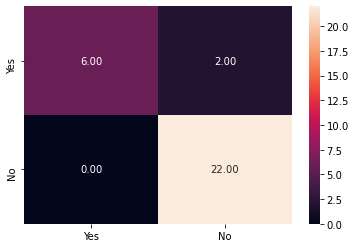

In [25]:
tree_cm = metrics.confusion_matrix(tree_test_pred.predicted,tree_test_pred.actual)
sns.heatmap(tree_cm, annot= True,fmt='.2f', xticklabels = ["Yes", "No"], yticklabels = ["Yes" , "No"])

Text(0.5, 0, 'Predicted label')

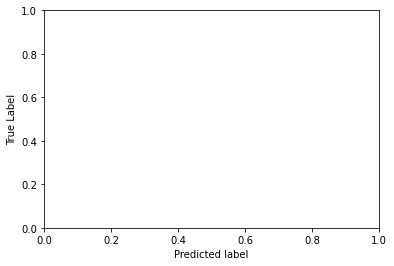

In [26]:

plt.ylabel('True Label')
plt.xlabel('Predicted label')

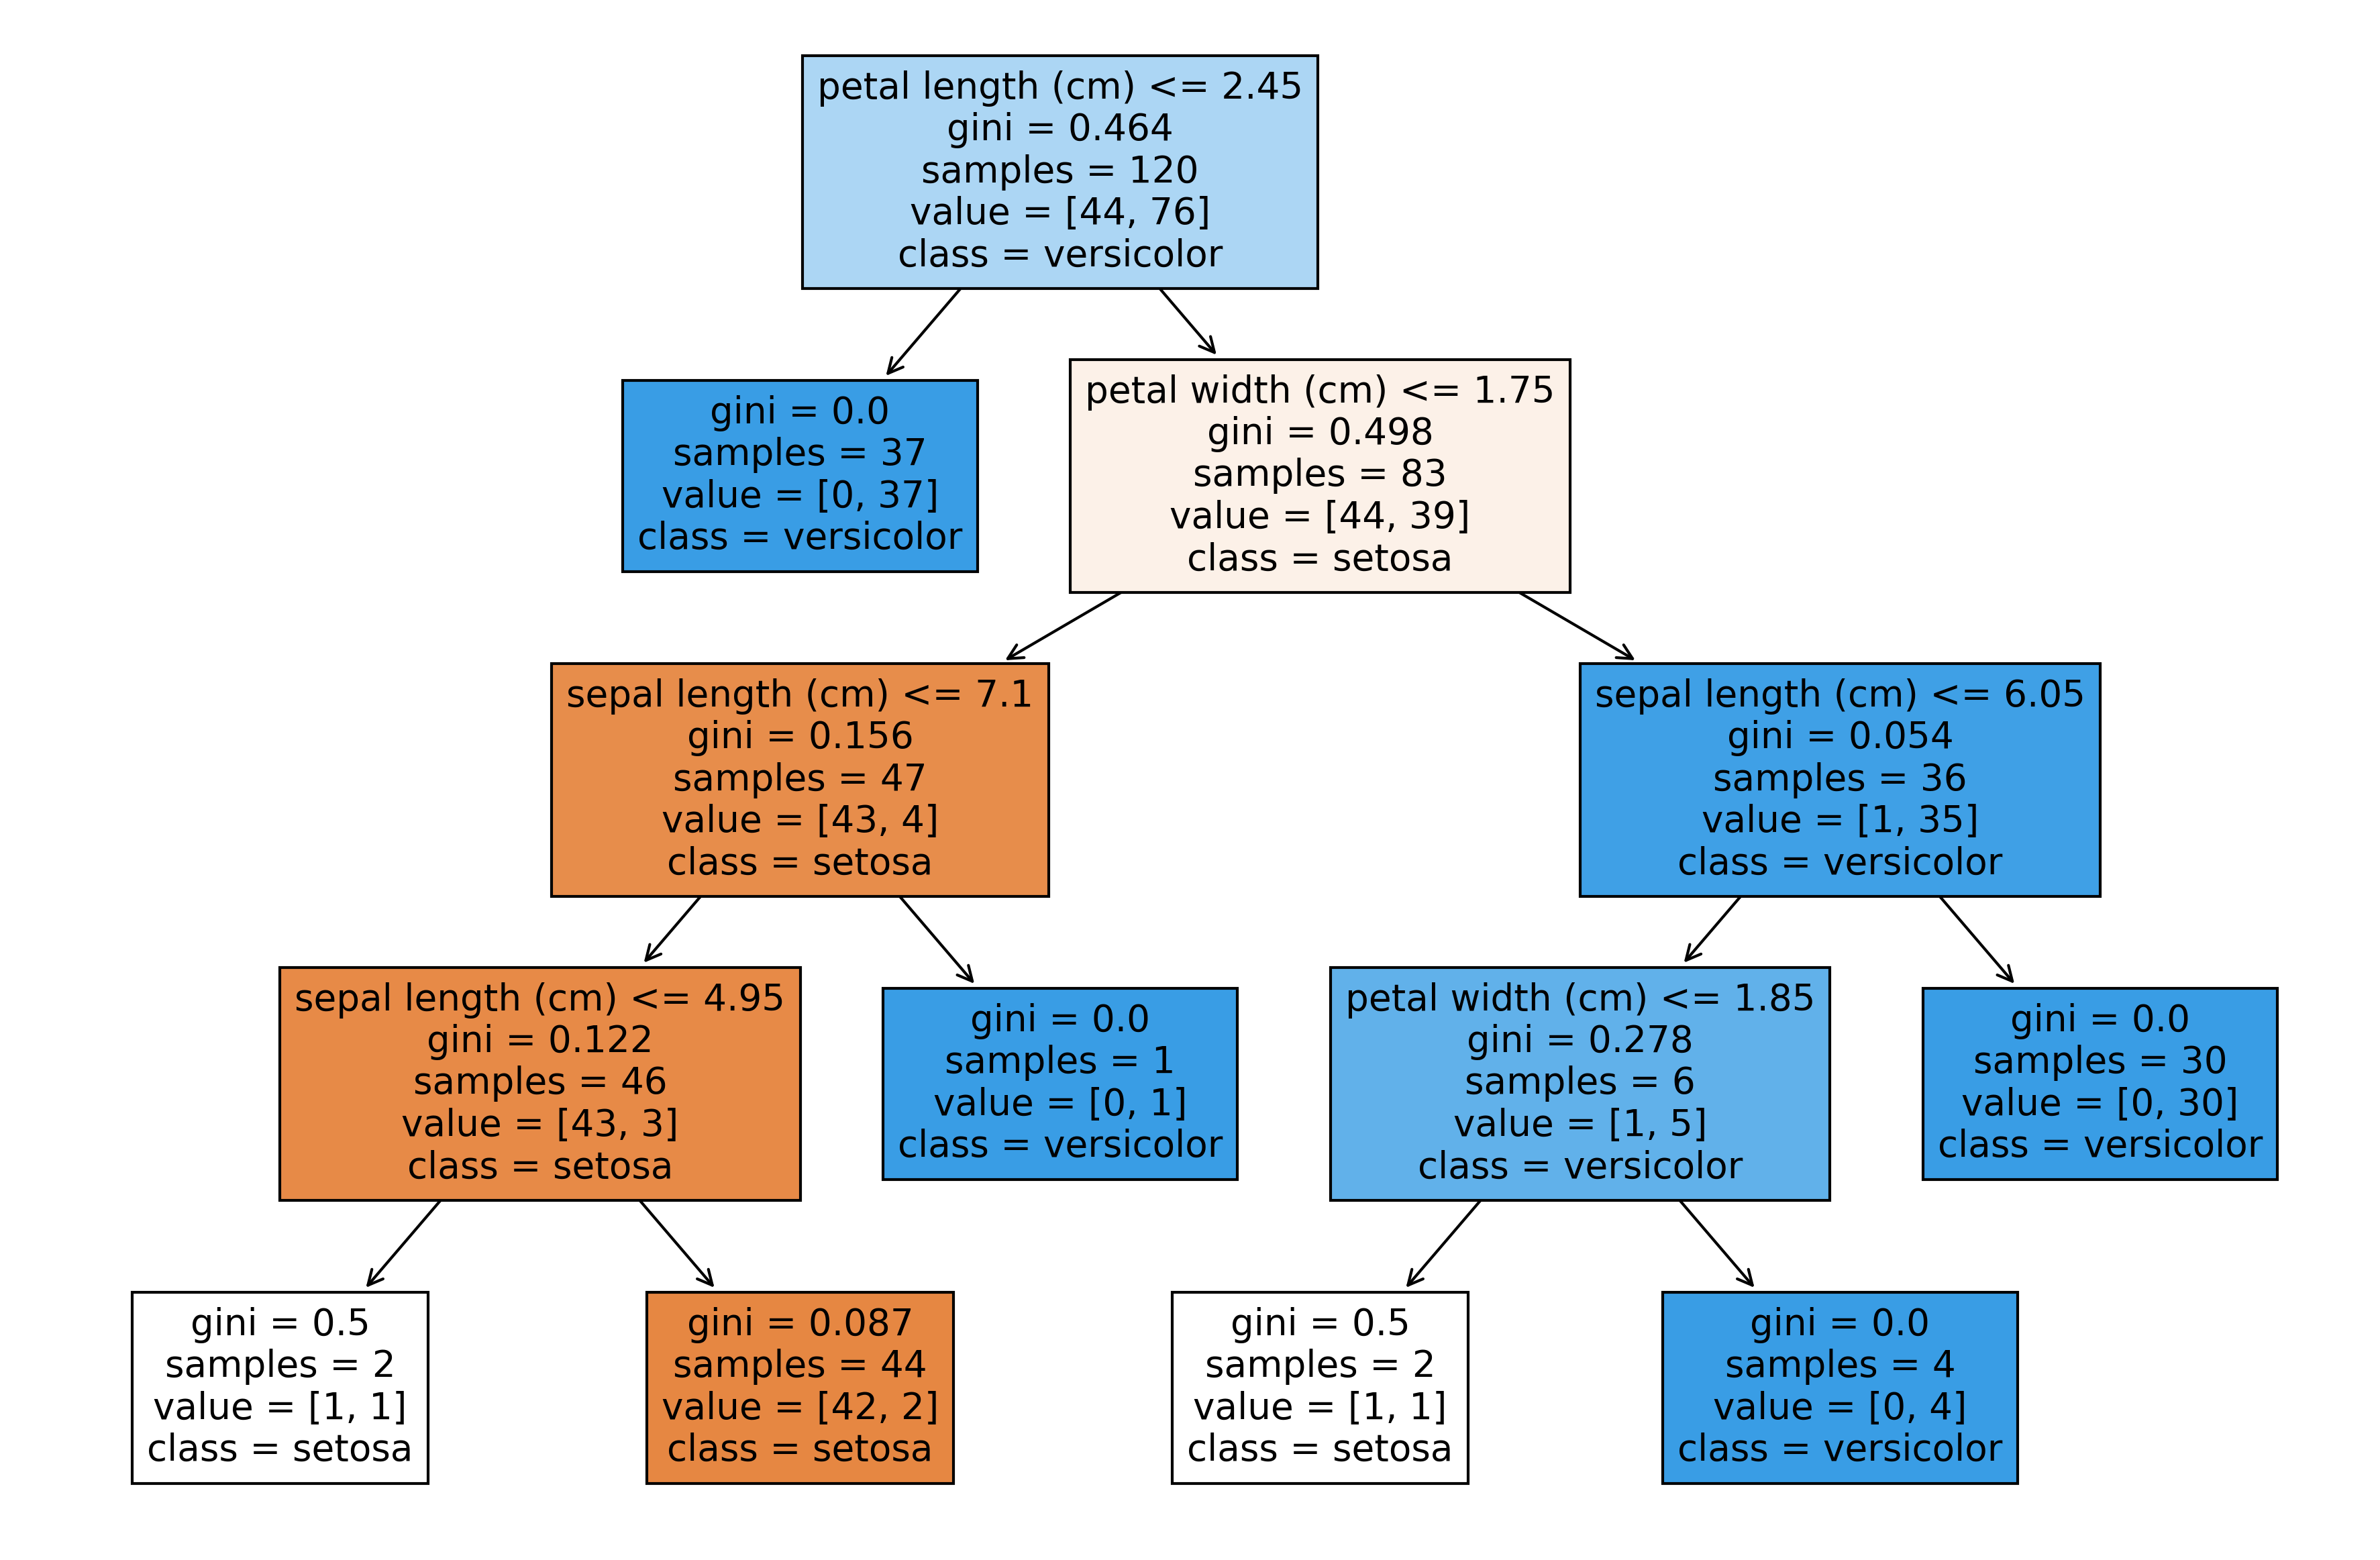

In [27]:
from sklearn import tree
fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa','versicolor', 'virginica']
fig,axes = plt.subplots(nrows= 1, ncols = 1, figsize=(15,10),dpi=300)
tree.plot_tree(clf_tree,
              feature_names = fn,
              class_names=cn,
              filled = True);
fig.savefig('imagename.png')